<a href="https://colab.research.google.com/github/vitor-thompson/aula_python_uerj/blob/main/C%C3%B3pia_de_aula10_ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integração e análise numérica

A integração numérica é composta por uma ampla gama de algoritmos para **calcular o valor numérico de uma integral definida**.

O termo também é usado para se referir a métodos numéricos para determinar a solução de equações diferenciais ordinárias (ODEs), que veremos na próxima aula.

## Soma de Riemann

Um exemplo de algoritmo de cálculo numérico de uma integral é a **soma de Riemann**, que é um tipo de aproximação por uma soma finita.

A soma de Riemann é calculada particionando-se a região de integração em ***formas*** "pequenas" (retângulos, trapezóides, parábolas, cubos) que somadas compõem uma região que é similar à função sendo medida. Ao calcular-se a área de cada uma dessas formas e ao adicionar cada uma dessas pequenas áreas, obtém-se a integral. Essa abordagem pode ser usada para encontrar uma aproximação númerica de uma integral definida.


### Definição de soma de Riemann

Considerando-se uma função $f$ definida no intervalo fechado $[a,b] \in \mathbb{R}$, a soma de Riemann é:

<br><br>
<p align=center>$S  = \sum_{i=1}^{n} f(x_i^*)\Delta_{x_i}$ </p>
<br><br>

onde $\Delta_{x_i} = x_{i} - x_{i-1}$ e $x_i^* \in [x_{i-1}, x_i]$  
<br>

**Ao determinarmos a escolha de $x_i^*$, determinamos o tipo de soma de Riemann.**

Alguns exemplos de métodos de integração de Riemann são:
* **Soma de Riemann pela esquerda**: quando $x_i^* = x_{i-1} \; \forall \;i$ (para todos os intervalos);
* **Soma de Riemann pela direita**: quando $x_i^* = x_{i} \; \forall \;i$ ;
* **Soma trapezoidal**.




![](https://raw.githubusercontent.com/malbouis/Python_intro/master/aulas_2020-2/figuras/somas_de_Riemann.png)

<br><br>
**Vejamos um exemplo de soma de Riemann abaixo.**




Imaginemos um problema simples de integração, com resultado analítico, como a exponencial:

$f(x) = \mathrm{e}^{-x}  \Rightarrow \qquad \int ^{10}_{0} f(x)dx = -1* \left(\mathrm{e}^{-10} - \mathrm{e}^{0}\right)  = 0.9999546000702375$


In [ ]:
import math
math.exp(0)-math.exp(-10)


0.9999546000702375

Ao fazer uma  integração numérica da função f(x), a largura escolhida do intervalo pode influenciar na precisão do resultado. Nesse mesmo exemplo anterior, por exemplo, se decidirmos usar intervalos de largura $1$.

In [ ]:
x=range(0,10)
y=[math.exp(-xi) for xi in x]  # isto se chama "list comprehension"
print(x)
print(y)

range(0, 10)
[1.0, 0.36787944117144233, 0.1353352832366127, 0.049787068367863944, 0.01831563888873418, 0.006737946999085467, 0.0024787521766663585, 0.0009118819655545162, 0.00033546262790251185, 0.00012340980408667956]


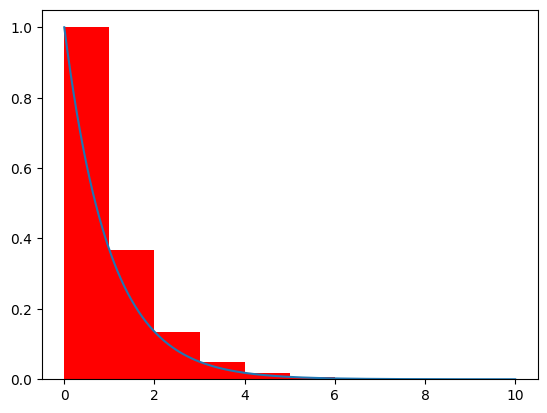

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.bar(x,y,color="red",align="edge",width=1)
x1 = np.linspace(0,10, 1000) # intervalo de 0 a 10, com 1000 divisões
y1=[math.exp(-xi) for xi in x1]
plt.plot(x1,y1)
plt.show()

* Os retângulos acima representam a soma de Riemann pela esquerda ou direita?

* Se fizermos a soma de Riemann dos retângulos acima, o resultado deveria ser __maior__ ou __menor__ do que a integral analítica?

In [ ]:
x_i = 0
x_f = 10
dx = 1
x = np.arange(x_i,x_f,dx)
S = 0
for xi in x:
    S = S+ math.exp(-xi)*dx # *dx que é 1 nesse caso

print("Soma de 10 caixinhas= ",S)

Soma de 10 caixinhas=  1.5819048852379485


In [ ]:
x_i = 0
x_f = 10
dx = 0.00000001
n_steps = round((x_f - x_i)/dx)

x = np.arange(x_i,x_f,dx)

S1= 0
for xi in x:
    S1 = S1+ math.exp(-xi) * dx

print(f"Soma de {n_steps} caixinhas = ",S1)

Soma de 1000000000 caixinhas =  0.9999546050698686


## Exercícios

1. Quantos intervalos (ou qual largura de intervalo) é preciso implementar para ter uma precisão de 1% no resultado numérico na integração de $f(x)$ de 0 a 10?

$\dfrac{R_{num}-R_{an}}{R_{an}} \leq 10\% $

2. Faça a integração numérica pela esquerda da mesma função. Compare o resultado com a integração pela direita.

3. Faça a integração por trapézios. Lembre que a área de um trapézio é dada por: $A=\frac{(a + b)h}{2}$

3. Faça a integração numérica das funções trigonométricas $\sin(x)$ e $\cos(x)$ num período $0 < x \leq 2\pi$

4. Faça a integração das funções hiperbólicas  $\sinh(x)$ e $\cosh(x)$ no intervalo $0-10$.

In [ ]:
#exercicio1
import math
import numpy as np

f_x = math.exp(0)-math.exp(-10)

def S_Riemann(dx):
  S = 0
  x_i = 0
  x_f = 10
  x = np.arange(x_i,x_f,dx)
  for xi in x:
      S = S+ math.exp(-xi)*dx

  return S

def precicao():
  dx = 1
  S = 0
  precision = math.fabs((f_x - S)/f_x)
  while ( precision >= 0.01) :
    S = S_Riemann(dx)
    dx = dx/10
    precision = math.fabs(f_x - S)/f_x
  print(dx)
  print(S)

precicao()

0.001
1.0049627060117017


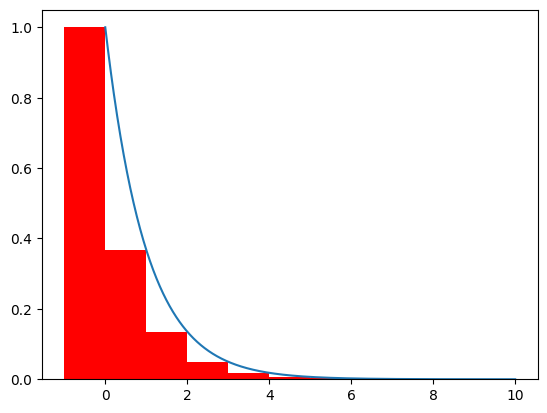

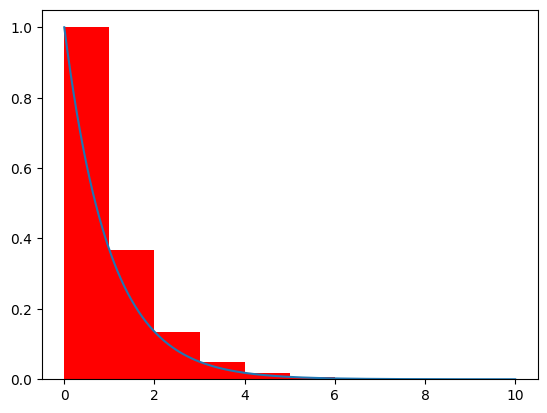

In [ ]:
#exercicio2 pela esquerda e pela direita?


import math
import matplotlib.pyplot as plt
import numpy as np

#Direita
x=range(0,10)
y=[1 * math.exp(-xi) for xi in x]

plt.bar(x,y,color="red",align="edge",width=-1)
x1 = np.linspace(0,10, 1000) # intervalo de 0 a 10, com 1000 divisões
y1=[1 * math.exp(-xi) for xi in x1]
plt.plot(x1,y1)
plt.show()

#Esquerda
x=range(0,10)
y=[math.exp(-xi) for xi in x]

plt.bar(x,y,color="red",align="edge",width=1)
x1 = np.linspace(0,10, 1000) # intervalo de 0 a 10, com 1000 divisões
y1=[math.exp(-xi) for xi in x1]
plt.plot(x1,y1)
plt.show()

In [ ]:
#Exercicio3

import math
import numpy as np

def S_riemann_trapezio(f, a, b, n):
  S = 0

  h = (b - a) / n

  x = np.linspace(a, b, n + 1)

  y = f(x)

  S = (h/2) * (y[0] + y[-1] + 2 * np.sum(y[1:-1]))

  return S

def f(x):
  return np.exp(-x)

print(S_riemann_trapezio(f, 0, 10, 1000))

0.9999629330113499


In [ ]:
#exercicio4
import math
import numpy as np

def f_sin(x):
  return np.sin(x)

def f_cos(x):
  return np.cos(x)

print(S_riemann_trapezio(f_sin, 0, 2*math.pi, 10000))
#print(-1*math.cos(0)+(math.cos((2*math.pi))))

print(S_riemann_trapezio(f_cos, 0, 2*math.pi, 10000))
#print(math.sin(0)-(math.sin((2*math.pi))))

7.13546000114679e-17
0.0
0.0
2.4492935982947064e-16


In [ ]:
#exercicio5

def f_sinh(x):
  return np.sinh(x)

def f_cosh(x):
  return np.cosh(x)

print(S_riemann_trapezio(f_sinh, 0, 10, 10000))
#print((math.cosh(10)-1))

print(S_riemann_trapezio(f_cosh, 0, 10, 10000))
#print((math.sinh(10)-0))

11012.233837789387
11013.233792472785


### Exercícios extras de resolução numérica de equações diferenciais

1. Imagine que tem um/a maratonista treinando, que num trecho de $5 km$ tem velocidade quase constante de $12 km/h$. Produza uma lista da distância percorrida em intervalos de 1 minuto.

1. O/A mesmo/a atleta no seguinte trecho acelera por $200$ metros até chegar em $15 km/h$ por $2 km$. Queremos obter uma tabela ou gráfico da distância percorrida em função do tempo e o tempo total para chegar em $7 km$, faça isto utilizando listas.

1. Considere um pêndulo simples num plano. O comprimento da linha é $1$ metro, a massa é $0,2 kg$ e a aceleração de gravidade $9,8 m/s^2$. Faça um gráfico ou crie uma tabela para a posição em coordenadas cartesianas em função do tempo, utilizando listas.


- (opcional) Pesquise sobre o pacote numpy e os objetos desse pacote chamados array, tente utilizálos ao invés de listas para resolver os exercícios.

- (opcional) Pesquise sobre o pacote scipy e seu modulo integrate para resolver integrações ou equações diferenciais numéricamente.


# Análise numérica: resolução de equações diferenciais ordinárias (EDO)

Como resolver o problema quando ao invés de uma integração, onde temos somente um valor final, temos uma equação diferencial, onde **queremos uma série de valores em função de uma variável**.

Tomemos o exemplo do corredor, no primeiro intervalo, onde durante $5 km$ tem velocidade quase constante de $12 km/h$. A função que queremos obter é $d(t)$, com os dados  $d_{final}$, $d_{inicial}$, e $v = \dfrac{\mathrm{d}d}{\mathrm{d}t}$.

Analiticamente este problema é simples:

$ d(t) = d_{inicial} + v * t $

Então numericamente podemos fazer:


In [ ]:
d_inicial=0
d_final=5
v=12.                           #km/h
t=[i for i in range(0,30)]     #intervalos de 1 minuto, 30 minutos
d = [d_inicial+v/60 * ti for ti in t] # v em km/min
print(d)

[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2000000000000002, 1.4000000000000001, 1.6, 1.8, 2.0, 2.2, 2.4000000000000004, 2.6, 2.8000000000000003, 3.0, 3.2, 3.4000000000000004, 3.6, 3.8000000000000003, 4.0, 4.2, 4.4, 4.6000000000000005, 4.800000000000001, 5.0, 5.2, 5.4, 5.6000000000000005, 5.800000000000001]


Podemos também ver o gráfico

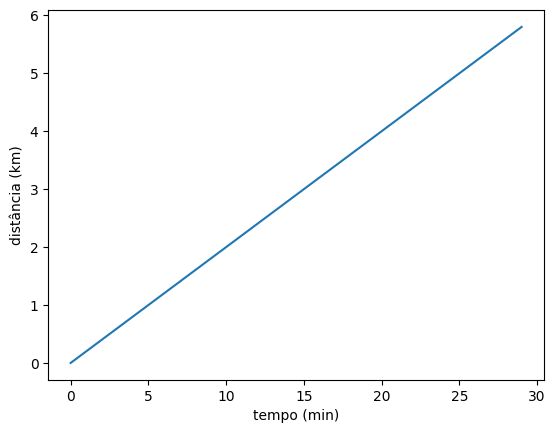

In [ ]:
import matplotlib.pyplot as plt
plt.plot(t,d)
plt.xlabel('tempo (min)')
plt.ylabel('distância (km)')
plt.show()


Para achar o tempo que demorou em percorrer os 5 kilômetros podemos utilizar a o método ```index``` da lista:

In [ ]:
i=d.index(5)
print("O atleta percorreu {0} kilômetros em {1} minutos".format(d[i],t[i]))

O atleta percorreu 5.0 kilômetros em 25 minutos


## Método de Euler

Se tivermos uma equação diferencial mais complexa, onde seja preciso fazer iterações, podemos utilizar o chamado método de Euler.
<br>
<br>

Vamos considerar $y(t)$ como uma solução da equação diferencial e sua derivada, $y'$, uma função de $t$ e $y(t)$:

<center>
$y' = f(t,y(t)) $

e

$y(t_0)=y_0$

</center>

Então podemos dividir o intervalo $t_0$ até $t_{n}$ em $n$ ***intervalos regulares*** de largura _h_

$h =\Delta t = \dfrac{t_{n}-t_0}{n} $,    

ou seja, $t_{n} = t_0 + n* h$

e de forma mais geral: $t_i = t_0 +i* h$.

<br>

Levando em conta que a derivada $y'(t_{n-1}) \approx y'_{n-1} = \frac{\Delta y}{\Delta t} = \frac{y_{n} - y_{n-1}}{h}$, temos que:

$y'_{n-1}*h = y_{n} - y_{n-1}$

Sendo assim, a aproximação numérica para a $y(t)$ é:

<br>

<center>
$\boxed{y(t_n) = y_n = y_{n-1} + y'_{n-1} * h}$

e

$y'_n = f(t_n,y_n) $
</center>

<br>

Nesse caso a primeira derivada $y'$ pode depender tanto do $t$ quanto do $y$, e precisamos ter um valor de contorno para $y_0$ e $y'_0$.

![](https://github.com/malbouis/Python_intro/blob/master/aulas/pics/euler.png?raw=true)


Vejamos um exemplo. Consideremos a seguinte equação diferencial com as condições de contorno:

$\frac{dy}{dt} = y$

$y(0) = 1$

$t_0 = 0$

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608, 16777216, 33554432, 67108864, 134217728, 268435456, 536870912, 1073741824, 2147483648, 4294967296, 8589934592, 17179869184, 34359738368, 68719476736, 137438953472, 274877906944, 549755813888, 1099511627776, 2199023255552, 4398046511104, 8796093022208, 17592186044416, 35184372088832, 70368744177664, 140737488355328, 281474976710656, 562949953421312, 1125899906842624, 2251799813685248, 4503599627370496, 9007199254740992, 18014398509481984, 36028797018963968, 72057594037927936, 144115188075855872, 288230376151711744, 576460752303423488, 1152921504606846976, 2305843009213693952, 4611686018427387904, 9223372036854775808, 18446744073709551616, 36893488147419103232, 73786976294838206464, 147573952589676412928, 295147905179352825856, 590295810358705651712, 1180591620717411303424, 2361183241434822606848, 4722366482869645213696, 9444732965739290427392, 

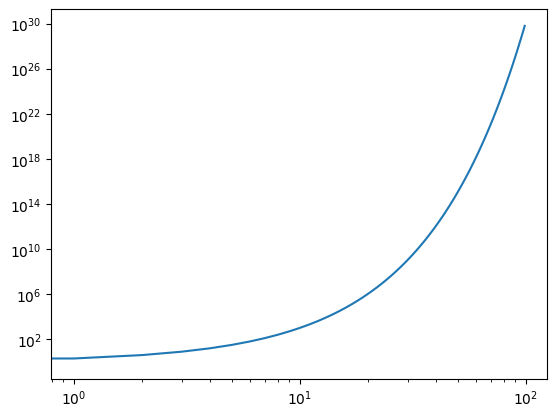

In [ ]:
import math
def f(t, y):
    """ exemplo de função dy/dt
        Nesse exemplo, dy/dt só depende de y.
    """
    return y

t = range(0,100) #t0 = 0
y=[]
y.append(1)      #y_0 = 1

dt = t[1]-t[0] #sabemos que nesse caso o intervalo é 1 pela construção da lista t, mas é melhor colocar para ser geral

for i in range(1,100) :
    yi = y[i-1]  + f(t[i-1],y[i-1]) * dt  #aprox. numérica do método de Euler
    y.append(yi)
print(y)

plt.yscale('log')
plt.xscale('log')
plt.plot(t,y)
plt.show()

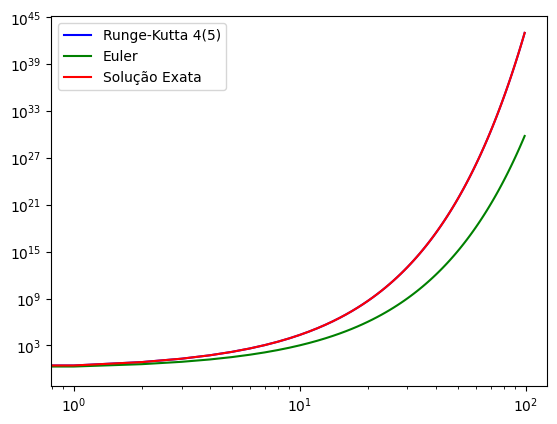

In [ ]:
from scipy.integrate import solve_ivp
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp
import numpy as np
import math

y0 = [1]
t = [i for i in range(0,100)]
sol = solve_ivp(f, [0,100], y0, method='RK45', t_eval=t)
#print(t)
#print(sol)
exp = [math.exp(i) for i in t]

# vamos imprimir para comparar o método de Euler com o padrão da função 'solve_ivp' (RK45)
plt.plot(sol.t, sol.y[0], 'b', label='Runge-Kutta 4(5)')
plt.plot(t,y, 'g', label='Euler')
plt.plot(t, exp, 'r', label='Solução Exata')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

Podemos modificar o tamanho dos intervalos regulares do método de Euler e ver se a estimativa pelo método de Euler melhora.

1000 1000


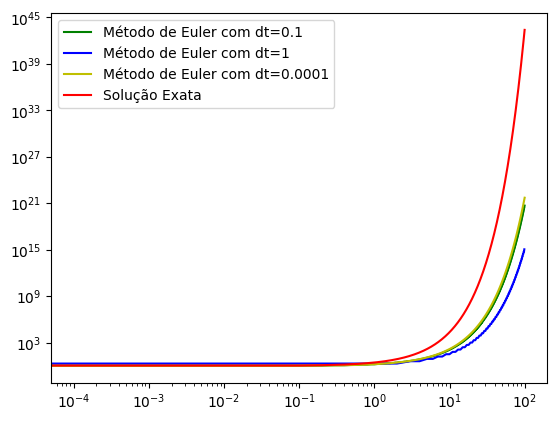

In [ ]:
import math
import numpy as np

def f(t, y):
    """ exemplo de função
        Nesse exemplo, dy/dt só depende de y.
    """
    return y

def Euler(fun, t, y0):

  y=[]
  y.append(y0)
  dt = t[1]-t[0]

  for i in range(len(t)-1) :
    yi = y[i-1]  + fun(t[i-1],y[i-1]) * dt
    y.append(yi)

  return t, y

t = np.arange(0,100, 0.1)
x,y = Euler(f, t, y0=1)

t2 = np.arange(0,100,1)
x2,y2 = Euler(f,t2,y0=1)

t3 = np.arange(0,100,0.0001)
x3,y3 = Euler(f,t3,y0=1)

exp = [math.exp(i) for i in x]
print(len(y), len(x))
plt.plot(x,y, 'g', label='Método de Euler com dt=0.1')
plt.plot(x2,y2, 'b', label='Método de Euler com dt=1')
plt.plot(x3,y3, 'y', label='Método de Euler com dt=0.0001')
plt.plot(t, exp, 'r', label='Solução Exata')

plt.yscale('log')
plt.xscale('log')
plt.legend()

Consideremos agora um segundo exemplo, com a seguinte equação diferencial e condições de contorno:

$y' + 2y = 2 - e^{-4t}$

$y(0) = 1$

O primeiro passo é determinar a função dy/dt:

$y' = 2 - 2y - e^{-4t}$

A solução da EDO pelo método de Euler no ponto $n$ é dada por:

$y_n = y_{n-1} + y'_{n-1}*dt$

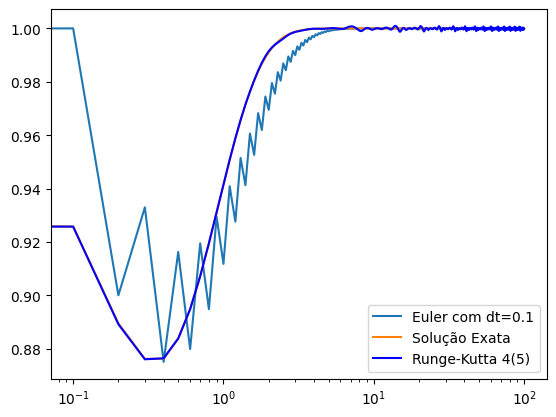

In [ ]:
from scipy.integrate import solve_ivp
import math
import numpy as np
import matplotlib.pyplot as plt


def func(t, y):
  return 2 - 2*y - math.exp(-4*t)

def Euler(fun, t, y0):
  y=[]
  y.append(y0)
  dt = t[1]-t[0]
  for i in range(len(t)-1) :
    yi = y[i-1]  + fun(t[i-1],y[i-1]) * dt
    y.append(yi)
  return t, y
#
y0 = [1]
t = np.arange(0,100, step)
sol = solve_ivp(func, [0,100], y0, method='RK45', t_eval=t)
#

step=0.1
t = np.arange(0,100, step)
x,y = Euler(func, t, y0=1)

# solução analítica é y(t) = 1 + 0.5*e^{-4t} - 0.5*e^{-2t}
y_sol = [1 + 0.5*math.exp(-4*i) - 0.5*math.exp(-2*i) for i in x]

plt.plot(x, y, label=f'Euler com dt={step}')
plt.plot(x, y_sol, label='Solução Exata')

#
plt.plot(t, sol.y[0], 'b', label='Runge-Kutta 4(5)')
#

#plt.yscale('log')
plt.xscale('log')
plt.legend()

### EDO de segunda ordem

Consideremos a seguinte EDO com suas condições de contorno:

$y'' - y' +3y = t \;\;\;\;$      (1)

$y(0) = 1$

$y'(0) = -2$

Para conseguir resolver essa EDO de segunda ordem, devemos reduzi-la a duas EDOs de primeira ordem:

$y_1(t) := y(t)$

$y_2(t) := y'(t) $

Logo, podemos reescrever a equação (1) como:

$y'_{2} - y_2 + 3y_1 = t \Rightarrow y'_{2} = y_2 - 3y_1 + t$

e

$y'_1 = y_2$

Com as condições de contorno $y_{1}(0)=1$ e $y_2(0)=-2$

Vamos construir o método de Euler para essas EDOs de primeira ordem:

4.177267183031822
-22.160554481346125
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.8

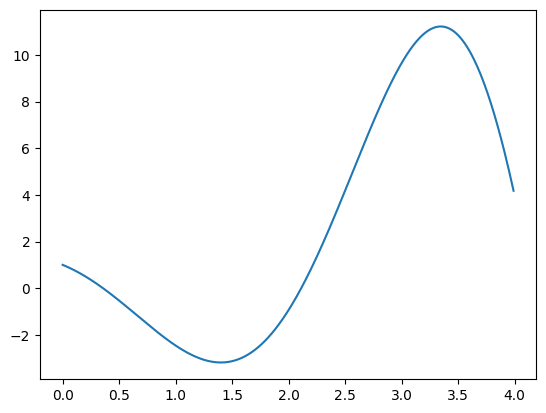

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def y2_prime(y2, y1, t):
  return y2 - 3*y1 + t

def y1_prime(y2):
  return y2

dt = 0.01
t = np.arange(0,4, dt)

y1_0 = 1           # condição de contorno
y1=[]
y1.append(y1_0)

y2_0 = -2          # condição de contorno
y2=[]
y2.append(y2_0)

for i in range(len(t)-1):
  #y1i = y1[i-1] + y1_prime(y2[i-1])*dt
  #y2i = y2[i-1] + y2_prime(y2[i-1], y1[i-1], t[i-1])*dt
  y1i = y1[i] + y1_prime(y2[i])*dt
  y2i = y2[i] + y2_prime(y2[i], y1[i], t[i])*dt

  y1.append(y1i)
  y2.append(y2i)

print(y1[-1])
print(y2[-1])
print(t)
plt.plot(t, y1)

### O pêndulo simples

No caso da **aceleração** assim como no caso do **pêndulo simples**, a equação diferencial é de segundo grau.

Nesse caso é necessário na iteração resolver para $v$ e para $x$.

A expressão para a aceleração pode ser uma função da posição, do tempo e também da velocidade, $a(v,x,t)$.

$ v(t_i)= v_{i} = v_{i-1} + a(v_{i-1},x_{i-1},t_{i-1}) * h $

e

$ x(t_i)= x_{i} = x_{i-1} + v_{i-1} *h $
<br>
<br>

A escolha do valor da velocidade pode ser:
* a velocidade no ponto anterior (**método de Euler**);
* a velocidade atualizada;
* uma média das duas (método do ponto médio).

0.004950615642007142
-0.0026020365964621412


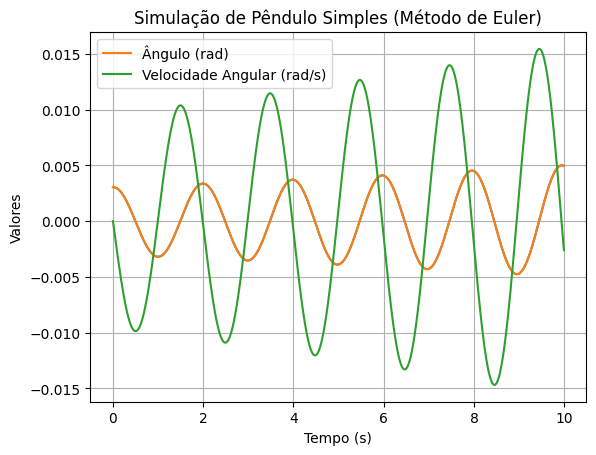

In [ ]:
# exercicio do pendulo simples
#pendulo simples edo python metodo de Euler
#tetha'' + w² * tetha = 0 ; w² = g/l
# x_1 = theta e x_2 = theta' => (x_2)' + W² * x_1 = 0


import numpy as np
import matplotlib.pyplot as plt

g = 10
l = 1
w_2 = g/l

#condições iniciais:

angulo_inicial = np.radians(0.174533)
velocidade_angular_incicial = 0

# metodo de Euler

def derivada_x2(x1):
  return -w_2 * x1

def derivada_x1(x2):
  return x2

dt = 0.01
t = np.arange(0,10, dt)

x1 = [angulo_inicial]
x2 = [velocidade_angular_incicial]

for i in range(len(t)-1):
  x1i = x1[i] + derivada_x1(x2[i]) * dt
  x2i = x2[i] + derivada_x2(x1[i]) * dt

  x1.append(x1i)
  x2.append(x2i)


print(x1[-1])
print(x2[-1])

plt.plot(t, x1)

plt.plot(t, x1, label='Ângulo (rad)')
plt.plot(t, x2, label='Velocidade Angular (rad/s)')
plt.xlabel('Tempo (s)')
plt.ylabel('Valores')
plt.title('Simulação de Pêndulo Simples (Método de Euler)')
plt.legend()
plt.grid(True)
plt.show()




### Exercícios extras de resolução numérica de equações  diferenciais (da aula passada)

1. Imagine que tem um/a maratonista treinando, que num trecho de $5 km$ tem velocidade quase constante de $12 km/h$. Produza uma lista distância percorrida em intervalos de 1 minuto.

1. O/A mesmo/a atleta no seguinte trecho acelera por $200$ metros até chegar em $15 km/h$ por $2 km$. Queremos obter uma tabela ou gráfico da distância percorrida en função do tempo e o tempo total para chegar em $7 km$, faça isto utilizando listas.

1. Considere um pêndulo simples num plano. O comprimento da linha é $1$ metro, a massa é $0,2 kg$ e a aceleração de gravidade $9,8 m/s^2$. Faça um gráfico ou crie uma tabela para a posição em coordenadas cartesianas em função do tempo, utilizando listas.

1. Resolva o pêndulo simples com coordenadas polares (ao invés de coordenadas cartesianas).

- (opcional) Pesquise sobre o pacote numpy e os objetos desse pacote chamados array, tente utilizálos ao invés de listas para resolver os exercícios.

- (opcional) Pesquise sobre o pacote scipy e seu modulo integrate para resolver integrações ou equações diferenciais numéricamente.


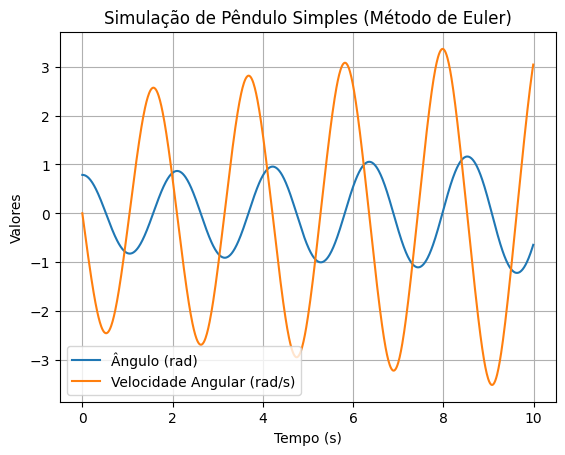

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
g = 9.81 # m/s^2
L = 1.0 # metros
dt = 0.01 # passo de tempo (h)
t_total = 10 # tempo total de simulação

# Condições iniciais
theta_0 = np.pi / 4 # 45 graus
omega_0 = 0.0

# Arrays para armazenar os resultados
t_values = np.arange(0, t_total, dt)
theta_values = np.zeros(len(t_values))
omega_values = np.zeros(len(t_values))

# Definir as condições iniciais
theta_values[0] = theta_0
omega_values[0] = omega_0

# Método de Euler
for i in range(1, len(t_values)):
    # Calculando as derivadas
    dtheta_dt = omega_values[i-1]
    domega_dt = -(g/L) * np.sin(theta_values[i-1])

    # Aplicando o método de Euler
    theta_values[i] = theta_values[i-1] + dtheta_dt * dt
    omega_values[i] = omega_values[i-1] + domega_dt * dt

# Plotando os resultados
plt.plot(t_values, theta_values, label='Ângulo (rad)')
plt.plot(t_values, omega_values, label='Velocidade Angular (rad/s)')
plt.xlabel('Tempo (s)')
plt.ylabel('Valores')
plt.title('Simulação de Pêndulo Simples (Método de Euler)')
plt.legend()
plt.grid(True)
plt.show()
